# Mutie Josiah - KNN project

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data=pd.read_csv(r"/content/ClassifiedData-230531-084835.csv",index_col=0)

In [ ]:
data.shape

(1000, 11)

In [ ]:
data["TARGET CLASS"].unique()

array([1, 0])

In [ ]:
data.head()

WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
0  0.913917  1.162073  0.567946  0.755464  0.780862  0.352608  0.759697   
1  0.635632  1.003722  0.535342  0.825645  0.924109  0.648450  0.675334   
2  0.721360  1.201493  0.921990  0.855595  1.526629  0.720781  1.626351   
3  1.234204  1.386726  0.653046  0.825624  1.142504  0.875128  1.409708   
4  1.279491  0.949750  0.627280  0.668976  1.232537  0.703727  1.115596   

        PJF       HQE       NXJ  TARGET CLASS  
0  0.643798  0.879422  1.231409             1  
1  1.013546  0.621552  1.492702             0  
2  1.154483  0.957877  1.285597             0  
3  1.380003  1.522692  1.153093             1  
4  0.646691  1.463812  1.419167             1

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [ ]:
data.describe()

WTT          PTI          EQW          SBI          LQE  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.949682     1.114303     0.834127     0.682099     1.032336   
std       0.289635     0.257085     0.291554     0.229645     0.243413   
min       0.174412     0.441398     0.170924     0.045027     0.315307   
25%       0.742358     0.942071     0.615451     0.515010     0.870855   
50%       0.940475     1.118486     0.813264     0.676835     1.035824   
75%       1.163295     1.307904     1.028340     0.834317     1.198270   
max       1.721779     1.833757     1.722725     1.634884     1.650050   

               QWG          FDJ          PJF          HQE          NXJ  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.943534     0.963422     1.071960     1.158251     1.362725   
std       0.256121     0.255118     0.288982     0.293738     0.204225   
min       0.262389     0.295228     0.299476     0.365157     0.639693   
25%       0.761064     0.784407     0.866306     0.934340     1.222623   
50%       0.941502     0.945333     1.065500     1.165556     1.375368   
75%       1.123060     1.134852     1.283156     1.383173     1.504832   
max       1.666902     1.713342     1.785420     1.885690     1.893950   

       TARGET CLASS  
count    1000.00000  
mean        0.50000  
std         0.50025  
min         0.00000  
25%         0.00000  
50%         0.50000  
75%         1.00000  
max         1.00000

In [ ]:
data.isnull().sum()

WTT             0
PTI             0
EQW             0
SBI             0
LQE             0
QWG             0
FDJ             0
PJF             0
HQE             0
NXJ             0
TARGET CLASS    0
dtype: int64

In [ ]:
data.dtypes.value_counts()

float64    10
int64       1
dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
st=StandardScaler()

In [ ]:
scaler=st.fit(data.drop("TARGET CLASS",axis=1))

In [ ]:
scaled_features=scaler.transform(data.drop("TARGET CLASS",axis=1))

In [ ]:
data_T=pd.DataFrame(scaled_features, columns=data.columns[:-1])

In [ ]:
data_T.head(3)

WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
0 -0.123542  0.185907 -0.913431  0.319629 -1.033637 -2.308375 -0.798951   
1 -1.084836 -0.430348 -1.025313  0.625388 -0.444847 -1.152706 -1.129797   
2 -0.788702  0.339318  0.301511  0.755873  2.031693 -0.870156  2.599818   

        PJF       HQE       NXJ  
0 -1.482368 -0.949719 -0.643314  
1 -0.202240 -1.828051  0.636759  
2  0.285707 -0.682494 -0.377850

# Exploratory Data Analysis

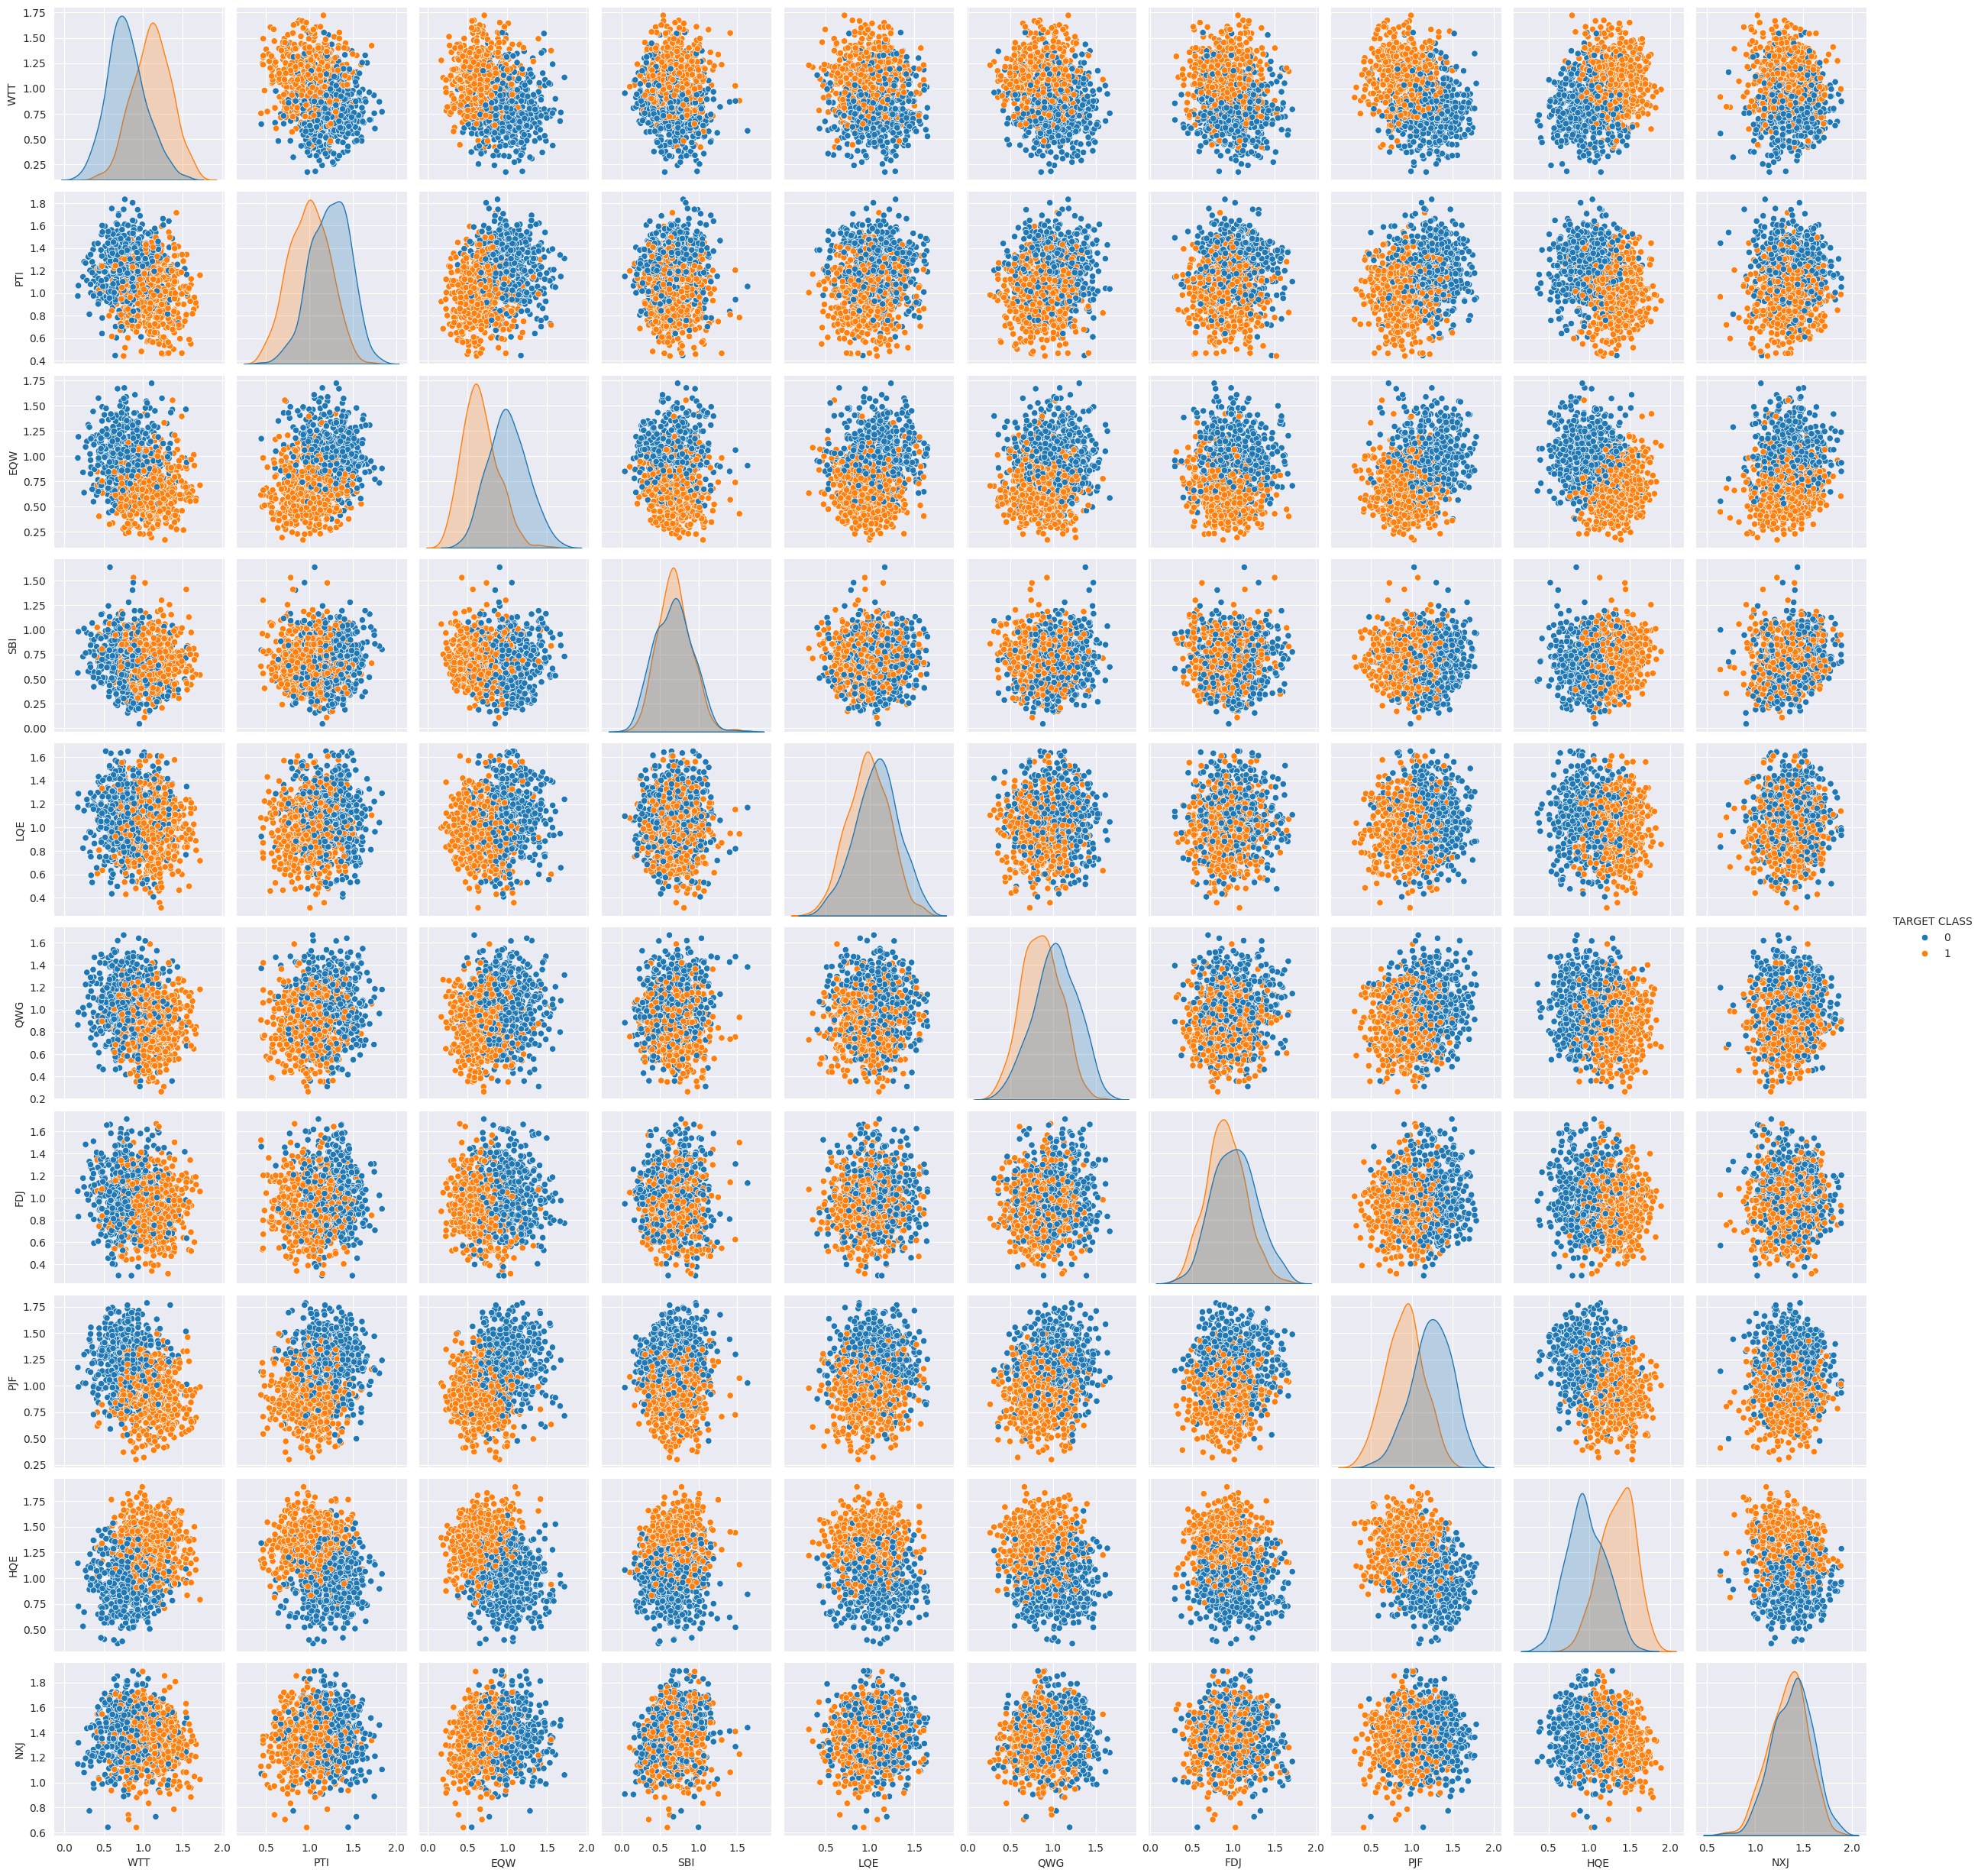

In [ ]:
sns.set_style("darkgrid")
sns.pairplot(data, hue="TARGET CLASS")

<Axes: >

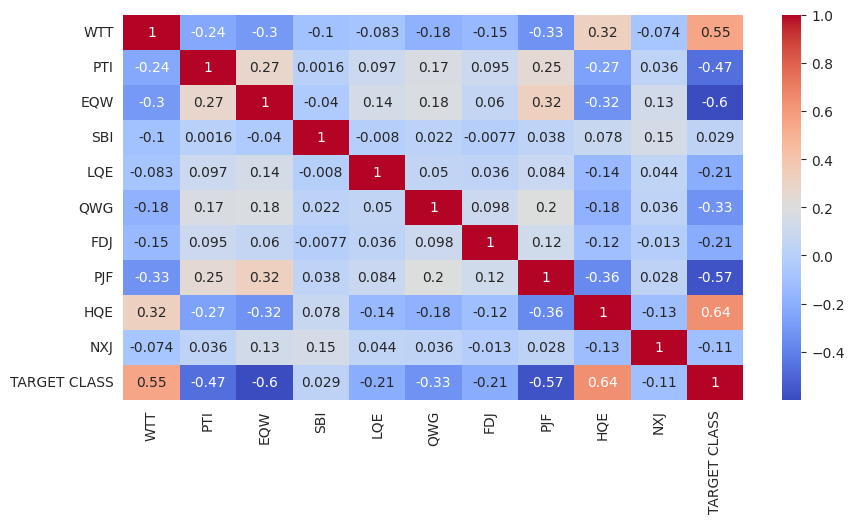

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),cmap="coolwarm", annot=True)

# model phase

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=scaled_features

In [ ]:
X

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [ ]:
y=data["TARGET CLASS"]

In [29]:
data["TARGET CLASS"].unique()

array([1, 0])

In [30]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
KNN_model=KNeighborsClassifier()

In [33]:
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

# evaluation and predictions

In [34]:
prediction=KNN_model.predict(X_test)

In [35]:
prediction

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0])

In [36]:
from sklearn.metrics import classification_report,confusion_matrix

In [37]:
print(confusion_matrix(y_test, prediction))

[[154   5]
 [ 12 129]]


In [38]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       159
           1       0.96      0.91      0.94       141

    accuracy                           0.94       300
   macro avg       0.95      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [39]:
error_rate= []

for i in range(1,40):

    Knn = KNeighborsClassifier(n_neighbors=i)
    Knn.fit(X_train,y_train)
    prediction_i=Knn.predict(X_test)
    error_rate.append(np.mean(prediction_i != y_test))

In [40]:
error_rate

[0.07666666666666666,
 0.09,
 0.05,
 0.07,
 0.056666666666666664,
 0.05,
 0.06666666666666667,
 0.06,
 0.05,
 0.056666666666666664,
 0.05333333333333334,
 0.04666666666666667,
 0.05,
 0.056666666666666664,
 0.056666666666666664,
 0.05,
 0.05,
 0.04666666666666667,
 0.05,
 0.05333333333333334,
 0.05,
 0.05,
 0.06333333333333334,
 0.056666666666666664,
 0.056666666666666664,
 0.05,
 0.05,
 0.04666666666666667,
 0.06,
 0.05,
 0.056666666666666664,
 0.04666666666666667,
 0.05333333333333334,
 0.043333333333333335,
 0.04666666666666667,
 0.043333333333333335,
 0.04666666666666667,
 0.043333333333333335,
 0.05]

Text(0, 0.5, 'Error Rate')

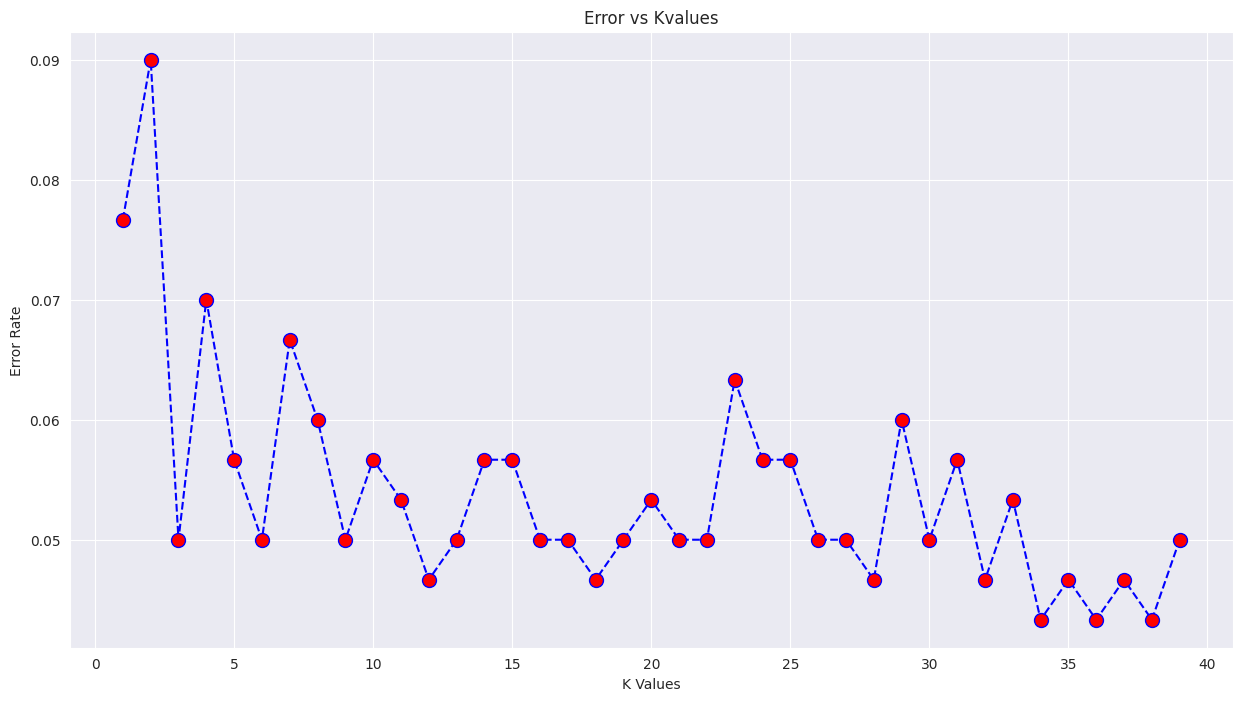

In [41]:
plt.figure(figsize=(15,8))
plt.plot(range(1,40),error_rate, color='blue', ls='dashed', marker='o', markerfacecolor='red',markersize=10)
plt.title("Error vs Kvalues")
plt.xlabel('K Values')
plt.ylabel('Error Rate')

In [42]:
Knn = KNeighborsClassifier(n_neighbors=1)
Knn.fit(X_train,y_train)
prediction=Knn.predict(X_test)

print('k=1')
print('\n')
print(confusion_matrix(y_test, prediction))
print('\n')
print(classification_report(y_test, prediction))

k=1


[[151   8]
 [ 15 126]]


              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [43]:
Knn = KNeighborsClassifier(n_neighbors=12)
Knn.fit(X_train,y_train)
prediction=Knn.predict(X_test)

print('k=12')
print('\n')
print(confusion_matrix(y_test, prediction))
print('\n')
print(classification_report(y_test, prediction))

k=12


[[155   4]
 [ 10 131]]


              precision    recall  f1-score   support

           0       0.94      0.97      0.96       159
           1       0.97      0.93      0.95       141

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [44]:
Knn = KNeighborsClassifier(n_neighbors=36)
Knn.fit(X_train,y_train)
prediction=Knn.predict(X_test)

print('k=36')
print('\n')
print(confusion_matrix(y_test, prediction))
print('\n')
print(classification_report(y_test, prediction))

k=36


[[153   6]
 [  7 134]]


              precision    recall  f1-score   support

           0       0.96      0.96      0.96       159
           1       0.96      0.95      0.95       141

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

